## Heart Failure Prediction
Heart failure is a common event caused by cardio-vascular diseases.This dataset contains 12 features and 299 records that can be used to predict mortality by heart failure.This dataset is taken from Kaggle.

Dataset Link:https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Loading Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('./Data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Details About The dataset
The dataset contains the following features:
* Age 
* Anaemia 
* Creatinine Phosphokinase 
* Diabetes
* Ejection Fraction
* High Blood Pressure
* Platelets
* Serum Creatinine
* Serum Sodium
* Sex
* Smoking
* Time 
* Death Event

Categorical Features:
* Anaemia 
* High Blood Pressure
* Sex
* Smoking
* Diabetes

Numerical Features:
* Age 
* Creatinine Phosphokinase 
* Ejection Fraction
* Platelets
* Serum Creatinine
* Serum Sodium
* Time 

### List Of Queries that are to be answered by Data Analysis

* The relationship between dependent and independent features
* With repect to categorical features, which category dies mostly due to heart attack.

In [3]:
print(df.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [4]:
continuous_features=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
categorical_features=['anaemia','diabetes','high_blood_pressure','sex','smoking']

### Checking For Null Values

In [5]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

### Data Analysis And Visualization

In [6]:
x_label=['0-Anaemic 1-Healthy','0-Diabetes 1-Healthy','0-Normal 1-High','0-Female 1-Male','0-Not Smoking 1-Smoking']
title=['Anaemia','Diabetes','High Blood Pressure','Sex','Smoking']

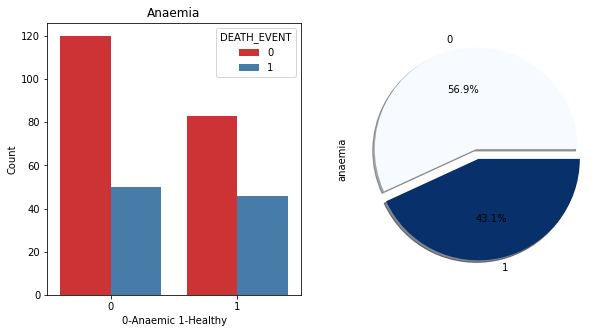

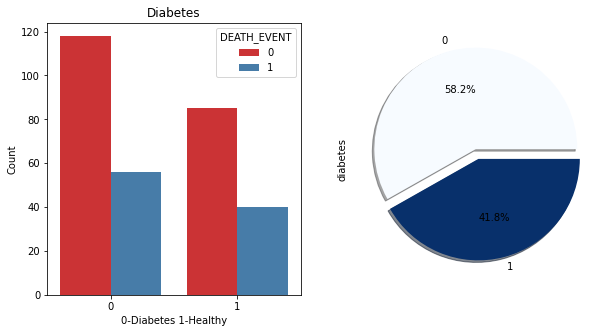

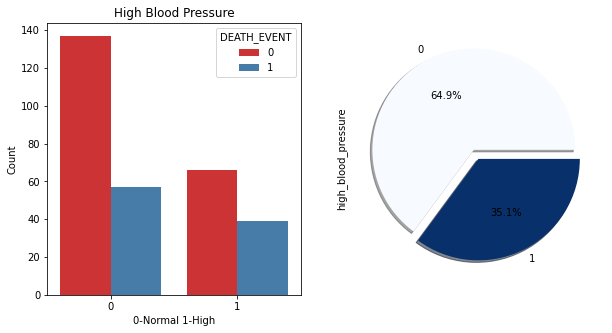

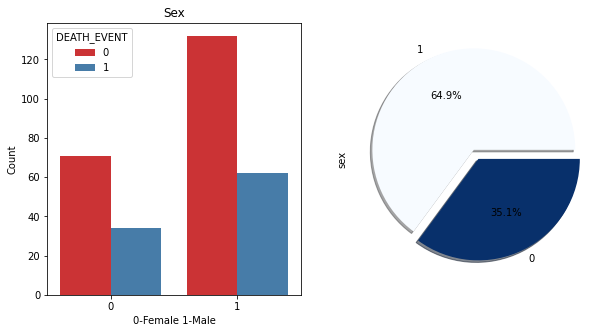

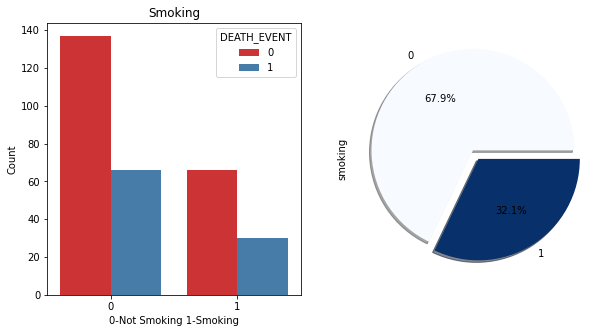

In [7]:
for i in range(len(categorical_features)):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    sns.countplot(x=categorical_features[i],data=df,hue='DEATH_EVENT',palette='Set1',ax=ax[0])
    ax[0].set_xlabel(x_label[i])
    ax[0].set_title(title[i])
    ax[0].set_ylabel('Count')
    df[categorical_features[i]].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',shadow=True,ax=ax[1],cmap='Blues')

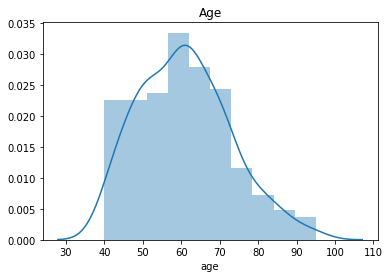

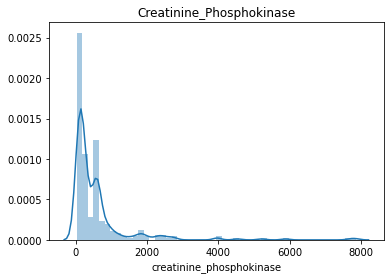

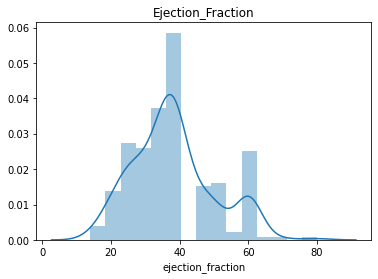

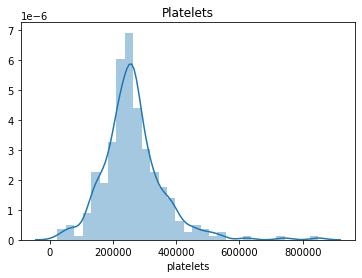

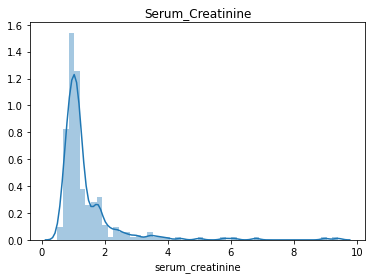

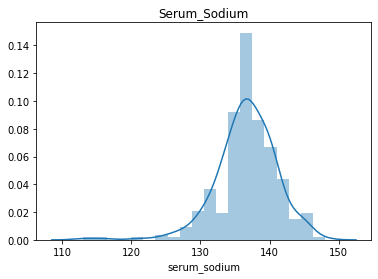

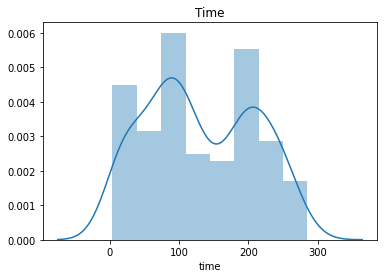

In [8]:
for feature in continuous_features:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature.title())
    plt.show()

(13.5, -0.5)

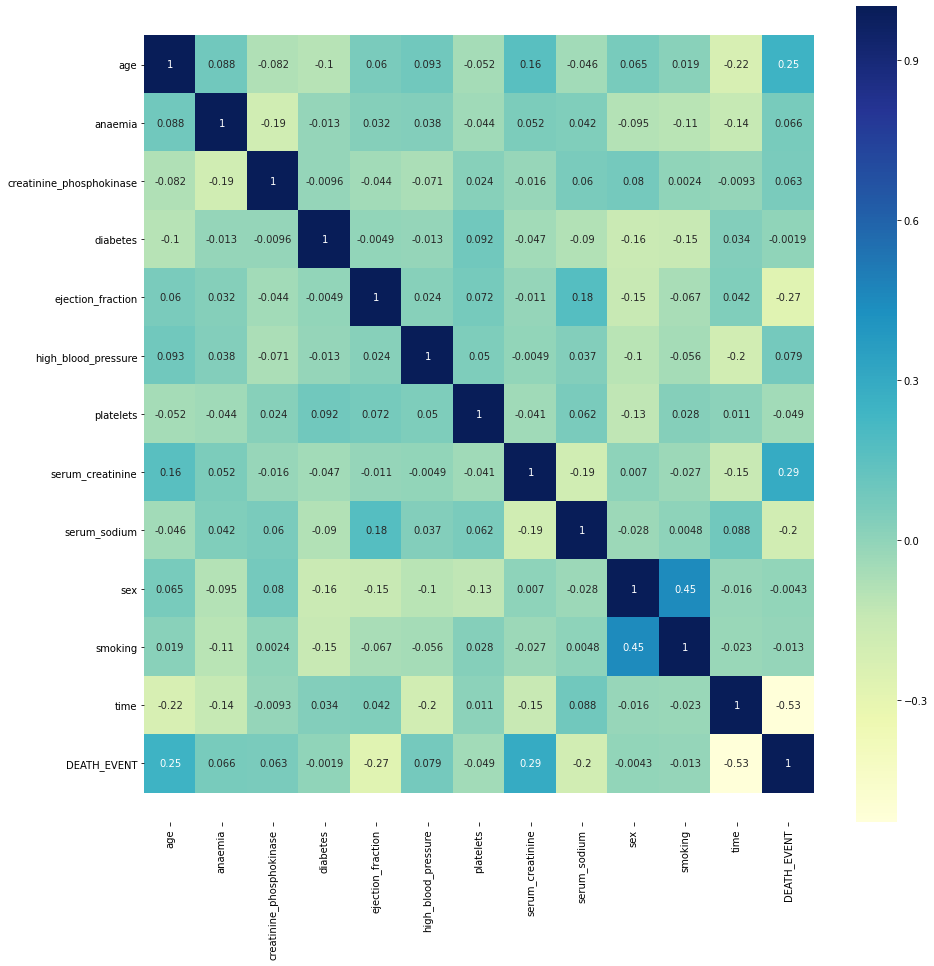

In [9]:
plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

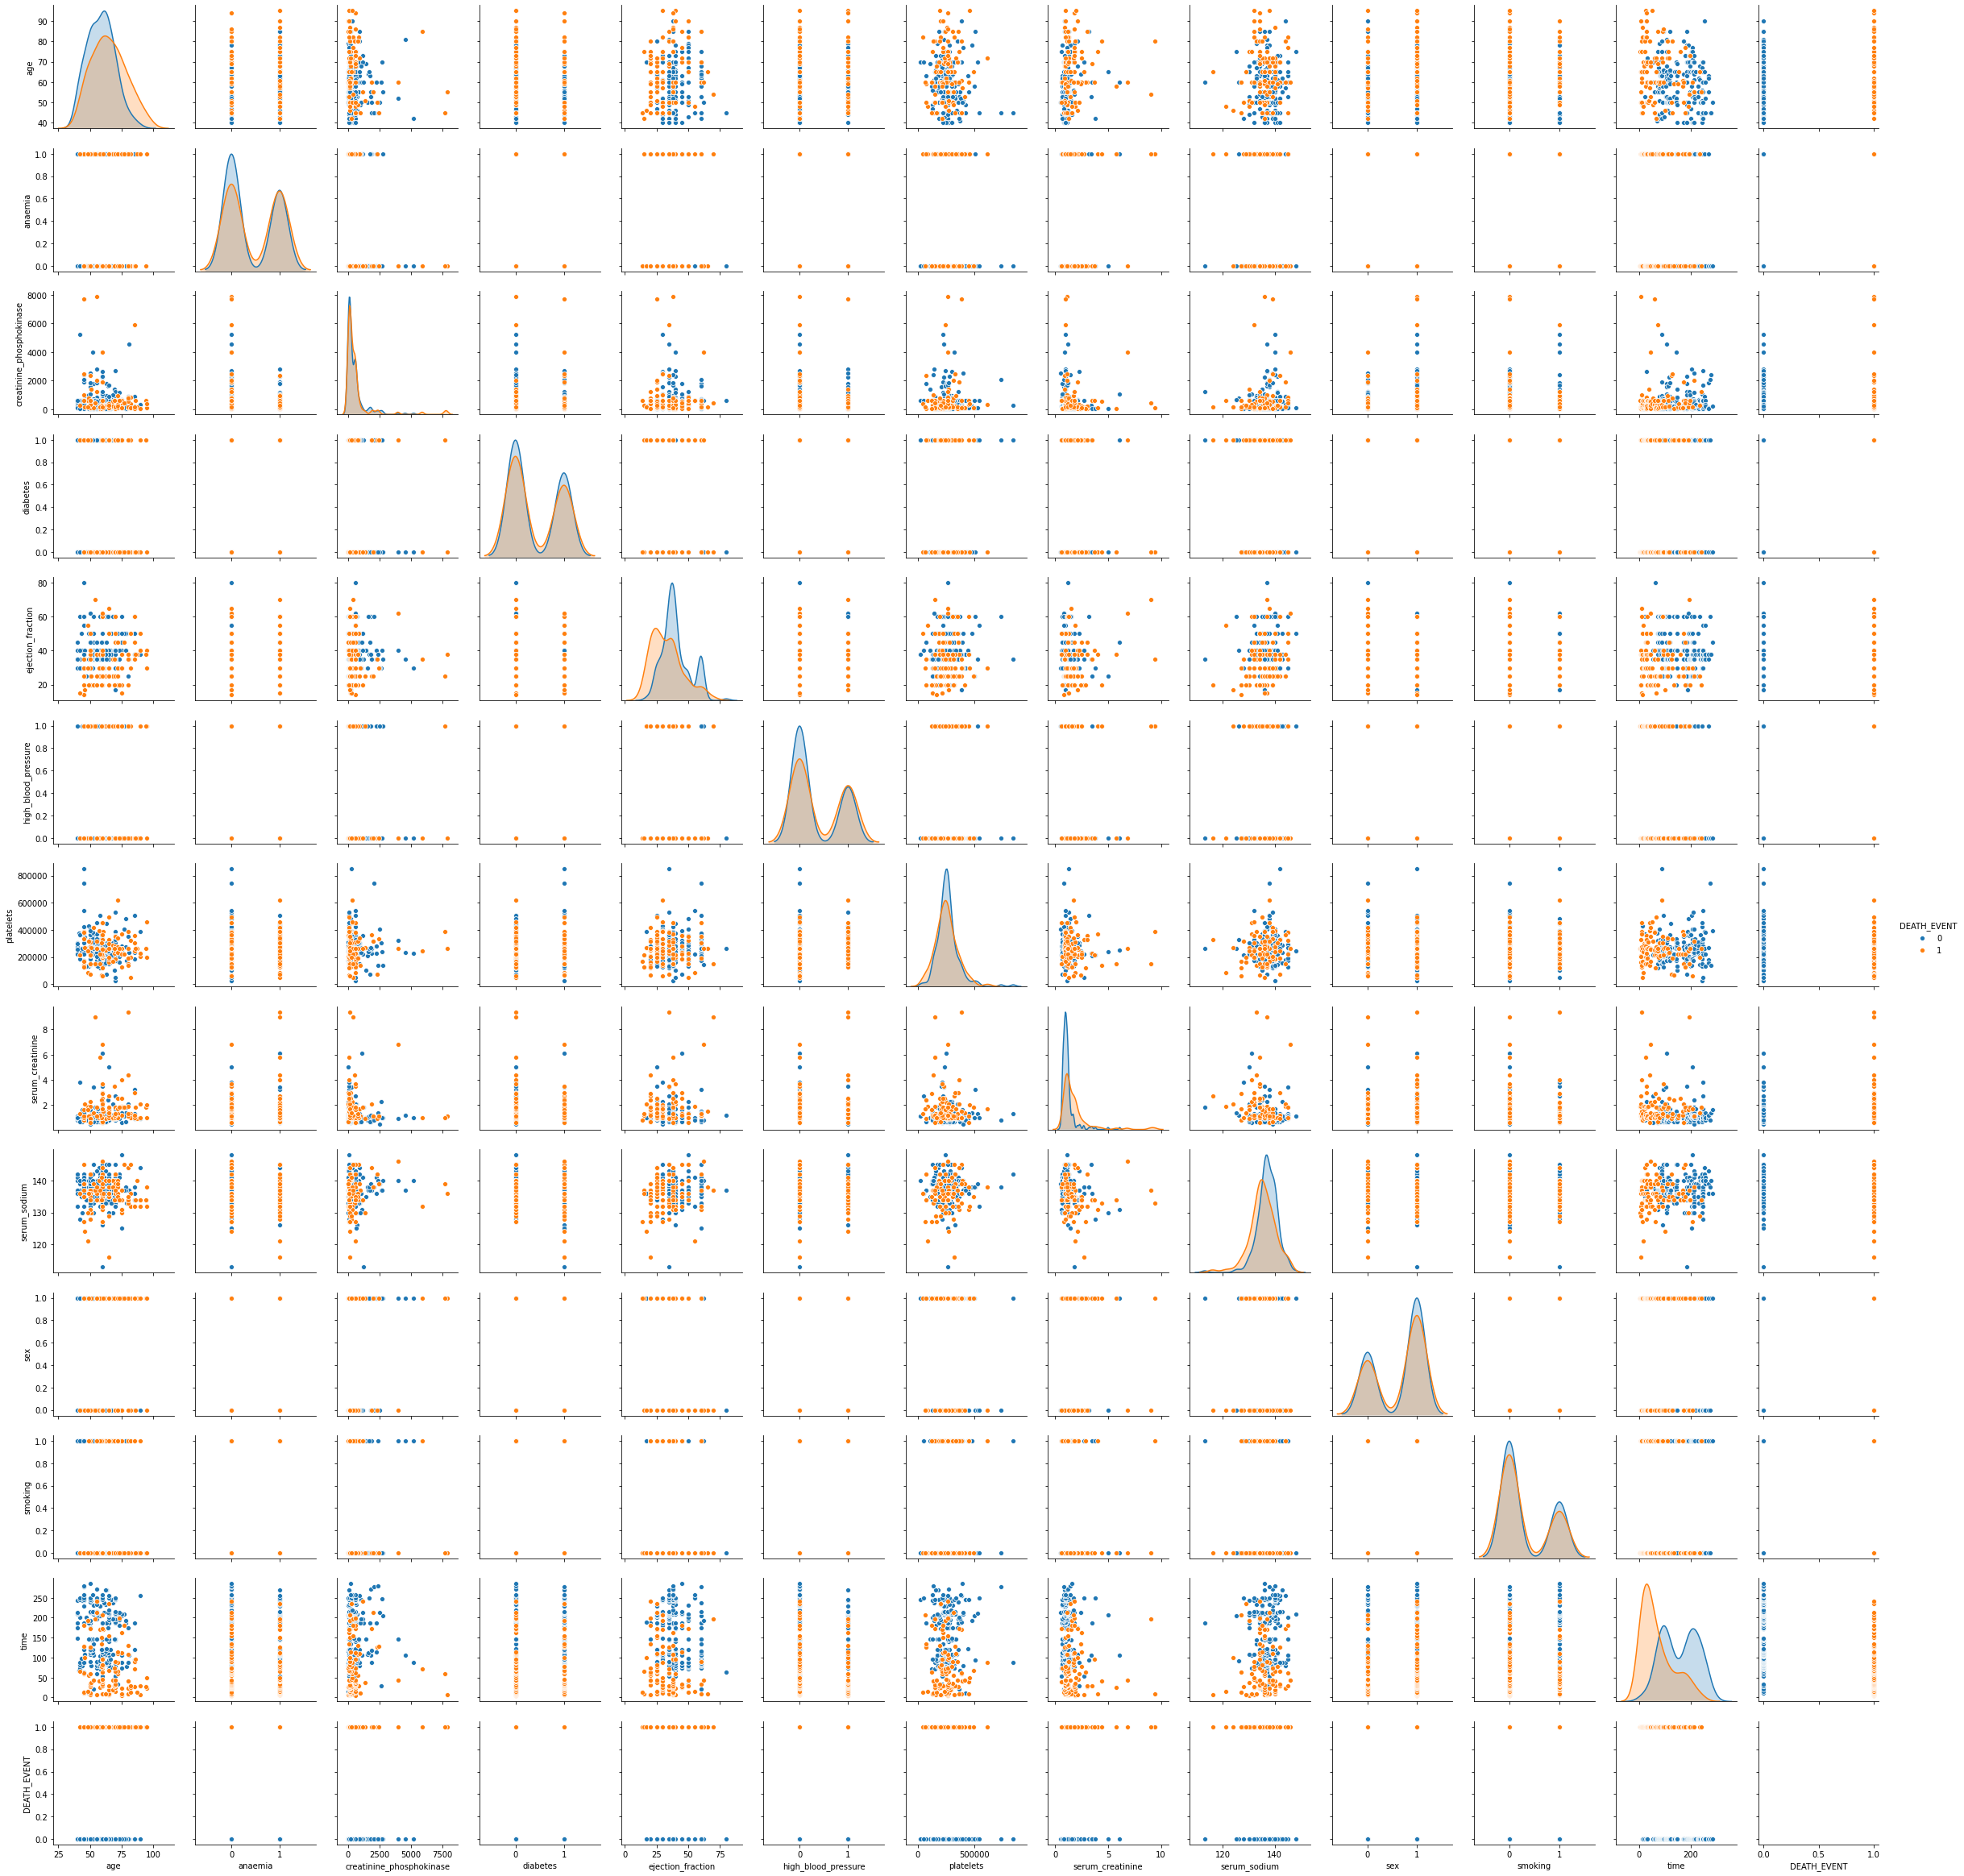

In [10]:
sns.pairplot(df,hue='DEATH_EVENT')

### Outliers

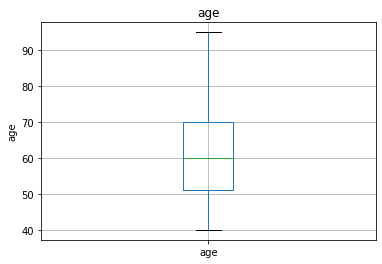

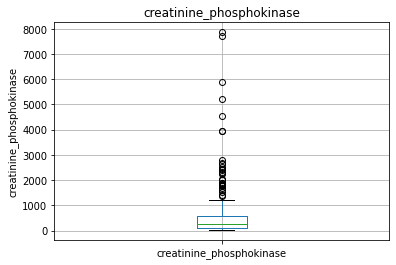

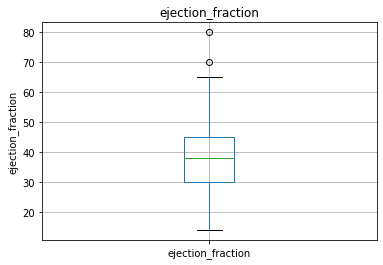

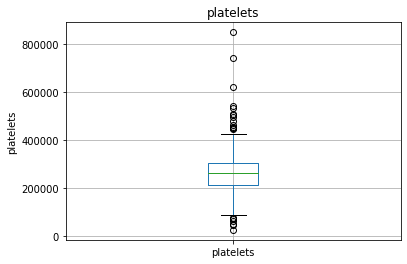

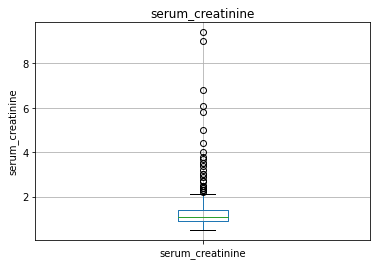

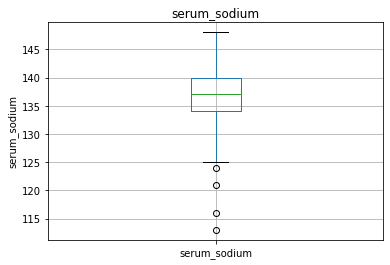

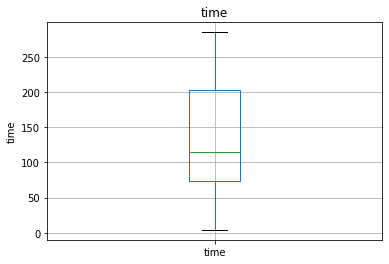

In [11]:
for feature in continuous_features:
    data=df.copy()
    data[feature]=data[feature]
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Inference from Data Analysis
* From analysing the categorical data with the respect to the death event answers for the following questions have been obtained
     * which gender person dies mostly due to heart attack ?
     * whether smoker or non smoker patients dies mostly due to heart attack ?
     * whether the anaemic or non anaemic patient dies mostly due to heart attack ?
     * whether the patient with high blood pressure dies mostly due to heart attack ?
     * whether the diabetic patient dies mostly due to heart attack ?
* Distribution of numerical features have been plotted to find the range of values which occurs the most
* With help of correlation matrix, we were able the find the correlation between features and is visualized using pairplot

### What can be done with this dataset ??
This clearly a classification problem whether the patients dies or not can be predicted with help of ML models like
* Logistic Regression
* K Nearest Neighbour
* Decision Tree
* Random Forest
* Boosting Algorithms

### Feature Scaling

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
min_max_scaler=MinMaxScaler()
df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']] = min_max_scaler.fit_transform(
    df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']])
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.449327,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.245552,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.395018,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [14]:
joblib.dump(min_max_scaler,'./scaler.pkl')

['./scaler.pkl']

### Handling Imabalanced Dataset

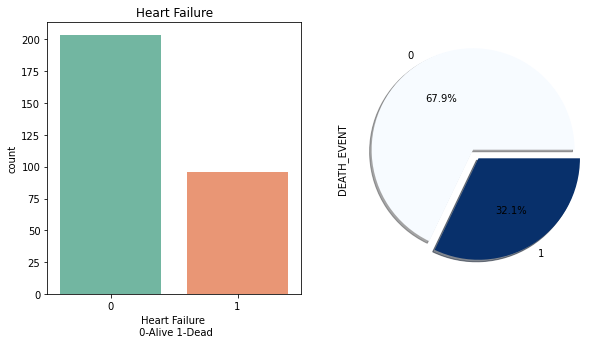

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='DEATH_EVENT',ax=ax[0],palette="Set2")
ax[0].set_xlabel("Heart Failure \n 0-Alive 1-Dead")
ax[0].set_title("Heart Failure")
df['DEATH_EVENT'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',shadow=True,ax=ax[1],cmap='Blues')

In [16]:
x=df.drop(['DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']
print(x.shape,y.shape)

(299, 12) (299,)


In [17]:
os =  RandomOverSampler()
x_new, y_new = os.fit_resample(x, y)
print(x_new.shape,y_new.shape)

(406, 12) (406,)


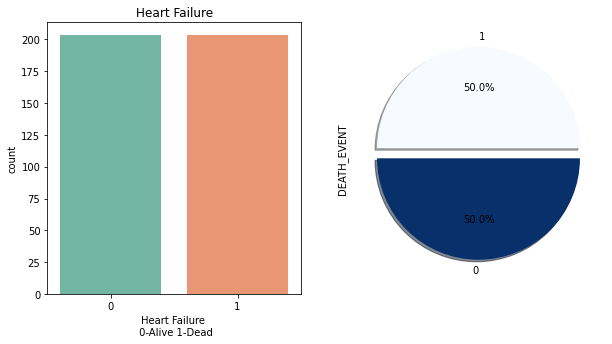

In [18]:
df_new=pd.concat([x_new,y_new],axis=1)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df_new,x='DEATH_EVENT',ax=ax[0],palette="Set2")
ax[0].set_xlabel("Heart Failure \n 0-Alive 1-Dead")
ax[0].set_title("Heart Failure")
df_new['DEATH_EVENT'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',shadow=True,ax=ax[1],cmap='Blues')

### Train Test Split

In [19]:
(X_train, X_test, y_train, y_test) = train_test_split(df_new.drop('DEATH_EVENT',axis=1),df_new['DEATH_EVENT'], test_size=0.20,random_state=101)
print('Total number of training samples: '+str(len(X_train)))
print('Total number of testing samples: '+str(len(X_test)))

Total number of training samples: 324
Total number of testing samples: 82


### Logisitic Regression

In [20]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
def confusion_metrics (conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    conf_misclassification = 1- conf_accuracy
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    conf_precision = (TN / float(TN + FP))
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {conf_accuracy}') 
    print(f'Mis-Classification: {conf_misclassification}') 
    print(f'Sensitivity: {conf_sensitivity}') 
    print(f'Specificity: {conf_specificity}') 
    print(f'Precision: {conf_precision}')
    print(f'f_1 Score: {conf_f1}')
test_scores=dict()

In [21]:
Lr = LogisticRegression()
parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],'C' : [100, 10, 1.0, 0.1, 0.01]}
cv_lr= GridSearchCV(Lr, parameters, cv=5)
cv_lr.fit(X_train,y_train)
print_results(cv_lr)

BEST PARAMS: {'C': 10, 'solver': 'liblinear'}

0.806 (+/-0.069) for {'C': 100, 'solver': 'newton-cg'}
0.806 (+/-0.069) for {'C': 100, 'solver': 'lbfgs'}
0.806 (+/-0.069) for {'C': 100, 'solver': 'liblinear'}
0.796 (+/-0.081) for {'C': 10, 'solver': 'newton-cg'}
0.796 (+/-0.081) for {'C': 10, 'solver': 'lbfgs'}
0.806 (+/-0.072) for {'C': 10, 'solver': 'liblinear'}
0.79 (+/-0.099) for {'C': 1.0, 'solver': 'newton-cg'}
0.79 (+/-0.099) for {'C': 1.0, 'solver': 'lbfgs'}
0.796 (+/-0.08) for {'C': 1.0, 'solver': 'liblinear'}
0.769 (+/-0.083) for {'C': 0.1, 'solver': 'newton-cg'}
0.769 (+/-0.083) for {'C': 0.1, 'solver': 'lbfgs'}
0.747 (+/-0.132) for {'C': 0.1, 'solver': 'liblinear'}
0.71 (+/-0.086) for {'C': 0.01, 'solver': 'newton-cg'}
0.71 (+/-0.086) for {'C': 0.01, 'solver': 'lbfgs'}
0.707 (+/-0.114) for {'C': 0.01, 'solver': 'liblinear'}


In [22]:
best_model_Lr=cv_lr.best_estimator_
test_result_Lr=best_model_Lr.predict(X_test)

The Accuracy of the model: 0.7804878048780488
The Confusion Matrix:


(2.5, -0.5)

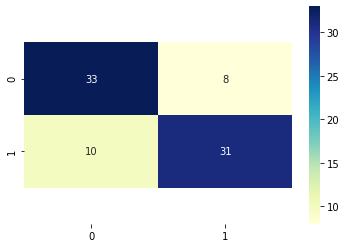

In [23]:
accuracy_lr=accuracy_score(test_result_Lr,y_test)
print("The Accuracy of the model:",accuracy_lr)
cm_Lr=confusion_matrix(test_result_Lr,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_Lr,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [24]:
print(classification_report(test_result_Lr,y_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.79      0.76      0.77        41

    accuracy                           0.78        82
   macro avg       0.78      0.78      0.78        82
weighted avg       0.78      0.78      0.78        82



In [25]:
confusion_metrics (cm_Lr)
test_scores['Logistic Regression']=[accuracy_lr,cv_lr.best_score_]

True Positives: 31
True Negatives: 33
False Positives: 8
False Negatives: 10
--------------------------------------------------
Accuracy: 0.7804878048780488
Mis-Classification: 0.2195121951219512
Sensitivity: 0.7560975609756098
Specificity: 0.8048780487804879
Precision: 0.8048780487804879
f_1 Score: 0.7797256097560976


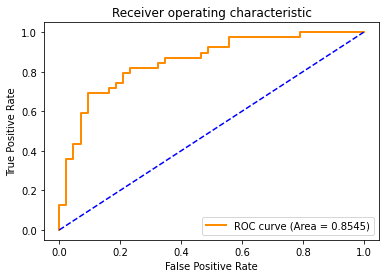

In [26]:
pred_prob1 = best_model_Lr.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [27]:
dt = DecisionTreeClassifier()
parameters = {"criterion":['gini','entropy'],"max_depth":range(1,11),"min_samples_split":range(1,5),"min_samples_leaf":range(1,5)}
cv_DT = GridSearchCV(dt, parameters, cv=5)
cv_DT.fit(X_train,y_train)
print_results(cv_DT)

BEST PARAMS: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}

nan (+/-nan) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 1}
0.769 (+/-0.109) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.769 (+/-0.109) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.769 (+/-0.109) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 1}
0.769 (+/-0.109) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.769 (+/-0.109) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.769 (+/-0.109) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 4}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 1, 'min_s

In [28]:
best_model_DT=cv_DT.best_estimator_
test_result_DT=best_model_DT.predict(X_test)

The Accuracy of the model: 0.7560975609756098
The Confusion Matrix:


(2.5, -0.5)

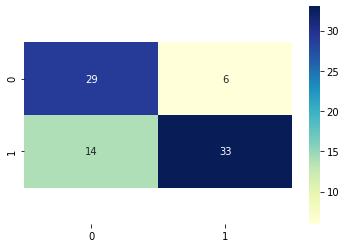

In [29]:
accuracy_dt=accuracy_score(test_result_DT,y_test)
print("The Accuracy of the model:",accuracy_dt)
cm_DT=confusion_matrix(test_result_DT,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_DT,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [30]:
print(classification_report(test_result_DT,y_test))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        35
           1       0.85      0.70      0.77        47

    accuracy                           0.76        82
   macro avg       0.76      0.77      0.76        82
weighted avg       0.77      0.76      0.76        82



In [31]:
confusion_metrics (cm_DT)
test_scores['Decision Tree']=[accuracy_dt,cv_DT.best_score_]

True Positives: 33
True Negatives: 29
False Positives: 6
False Negatives: 14
--------------------------------------------------
Accuracy: 0.7560975609756098
Mis-Classification: 0.24390243902439024
Sensitivity: 0.7021276595744681
Specificity: 0.8285714285714286
Precision: 0.8285714285714286
f_1 Score: 0.7601270849880859


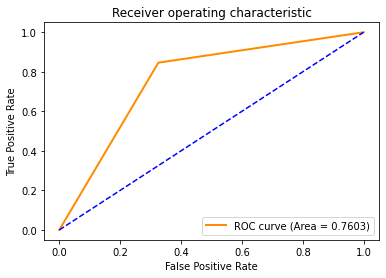

In [32]:
pred_prob1 = best_model_DT.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [33]:
RF = RandomForestClassifier(random_state=0)
parameters = {'max_depth': [5,10,None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': range(5,101,5)}
cv_RF= GridSearchCV(RF, parameters, cv=5)
cv_RF.fit(X_train,y_train)
print_results(cv_RF)

BEST PARAMS: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}

0.864 (+/-0.081) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
0.883 (+/-0.074) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.877 (+/-0.064) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}
0.874 (+/-0.103) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.874 (+/-0.101) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
0.877 (+/-0.091) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
0.877 (+/-0.101) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 35}
0.88 (+/-0.103) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.892 (+/-0.11) for {'max_depth': 5, 'min_samples_leaf': 1, '

In [34]:
best_model_RF=cv_RF.best_estimator_
test_result_RF=best_model_RF.predict(X_test)

The Accuracy of the model: 0.8902439024390244
The Confusion Matrix:


(2.5, -0.5)

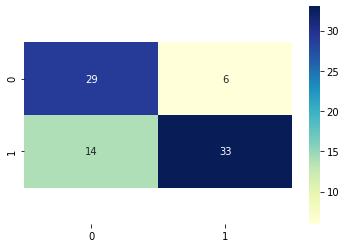

In [35]:
accuracy_rf=accuracy_score(test_result_RF,y_test)
print("The Accuracy of the model:",accuracy_rf)
cm_RF=confusion_matrix(test_result_DT,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_RF,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
print(classification_report(test_result_RF,y_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.95      0.84      0.89        44

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.90      0.89      0.89        82



In [37]:
confusion_metrics (cm_RF)
test_scores['Random Forest']=[accuracy_rf,cv_RF.best_score_]

True Positives: 33
True Negatives: 29
False Positives: 6
False Negatives: 14
--------------------------------------------------
Accuracy: 0.7560975609756098
Mis-Classification: 0.24390243902439024
Sensitivity: 0.7021276595744681
Specificity: 0.8285714285714286
Precision: 0.8285714285714286
f_1 Score: 0.7601270849880859


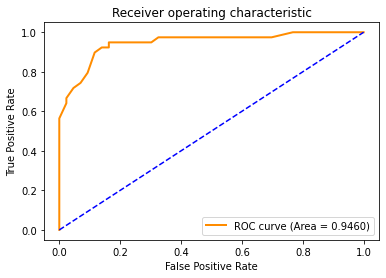

In [38]:
pred_prob1 = best_model_RF.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Adaptive Boosting

In [39]:
adaboost =  AdaBoostClassifier(random_state=0)
parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 'n_estimators': range(5,101,5)}
cv_ab= GridSearchCV(adaboost, parameters, cv=5)
cv_ab.fit(X_train,y_train)
print_results(cv_ab)

BEST PARAMS: {'learning_rate': 0.3, 'n_estimators': 100}

0.769 (+/-0.109) for {'learning_rate': 0.05, 'n_estimators': 5}
0.775 (+/-0.105) for {'learning_rate': 0.05, 'n_estimators': 10}
0.784 (+/-0.121) for {'learning_rate': 0.05, 'n_estimators': 15}
0.79 (+/-0.111) for {'learning_rate': 0.05, 'n_estimators': 20}
0.8 (+/-0.124) for {'learning_rate': 0.05, 'n_estimators': 25}
0.8 (+/-0.124) for {'learning_rate': 0.05, 'n_estimators': 30}
0.818 (+/-0.113) for {'learning_rate': 0.05, 'n_estimators': 35}
0.812 (+/-0.121) for {'learning_rate': 0.05, 'n_estimators': 40}
0.818 (+/-0.112) for {'learning_rate': 0.05, 'n_estimators': 45}
0.818 (+/-0.112) for {'learning_rate': 0.05, 'n_estimators': 50}
0.818 (+/-0.112) for {'learning_rate': 0.05, 'n_estimators': 55}
0.818 (+/-0.112) for {'learning_rate': 0.05, 'n_estimators': 60}
0.827 (+/-0.089) for {'learning_rate': 0.05, 'n_estimators': 65}
0.827 (+/-0.089) for {'learning_rate': 0.05, 'n_estimators': 70}
0.834 (+/-0.08) for {'learning_rate': 

In [40]:
best_model_ab=cv_ab.best_estimator_
test_result_ab=best_model_ab.predict(X_test)

The Accuracy of the model: 0.8536585365853658
The Confusion Matrix:


(2.5, -0.5)

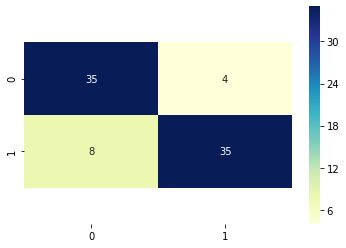

In [41]:
accuracy_ab=accuracy_score(test_result_ab,y_test)
print("The Accuracy of the model:",accuracy_ab)
cm_ab=confusion_matrix(test_result_ab,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_ab,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [42]:
print(classification_report(test_result_ab,y_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.90      0.81      0.85        43

    accuracy                           0.85        82
   macro avg       0.86      0.86      0.85        82
weighted avg       0.86      0.85      0.85        82



In [43]:
confusion_metrics (cm_ab)
test_scores['Adaboost']=[accuracy_ab,cv_ab.best_score_]

True Positives: 35
True Negatives: 35
False Positives: 4
False Negatives: 8
--------------------------------------------------
Accuracy: 0.8536585365853658
Mis-Classification: 0.14634146341463417
Sensitivity: 0.813953488372093
Specificity: 0.8974358974358975
Precision: 0.8974358974358975
f_1 Score: 0.8536585365853658


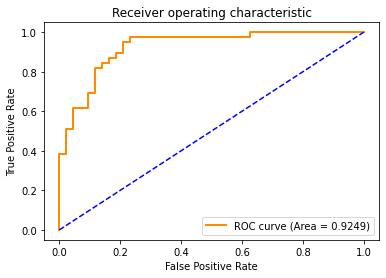

In [44]:
pred_prob1 = best_model_ab.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1) 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting

In [45]:
gb = GradientBoostingClassifier(random_state=0)
parameters = {"criterion":['friedman_mse', 'mse'],"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 'max_depth': [5,10,None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
cv_gb= GridSearchCV(gb, parameters, cv=5)
cv_gb.fit(X_train,y_train)
print_results(cv_gb)

BEST PARAMS: {'criterion': 'friedman_mse', 'learning_rate': 0.3, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 11}

0.858 (+/-0.112) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
0.855 (+/-0.109) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}
0.852 (+/-0.102) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 7}
0.861 (+/-0.118) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 8}
0.867 (+/-0.125) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}
0.87 (+/-0.135) for {'criterion': 'friedman_mse', 'learning_rate': 0.0

0.874 (+/-0.071) for {'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 5}
0.883 (+/-0.053) for {'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 6}
0.883 (+/-0.057) for {'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 7}
0.886 (+/-0.06) for {'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 8}
0.886 (+/-0.05) for {'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 9}
0.889 (+/-0.041) for {'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
0.883 (+/-0.046) for {'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samp

In [46]:
best_model_gb=cv_gb.best_estimator_
test_result_gb=best_model_gb.predict(X_test)

The Accuracy of the model: 0.9024390243902439
The Confusion Matrix:


(2.5, -0.5)

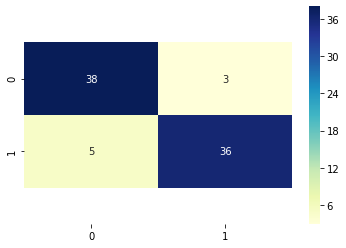

In [47]:
accuracy_gb=accuracy_score(test_result_gb,y_test)
print("The Accuracy of the model:",accuracy_gb)
cm_gb=confusion_matrix(test_result_gb,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_gb,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [48]:
print(classification_report(test_result_gb,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.92      0.88      0.90        41

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



In [49]:
confusion_metrics (cm_gb)
test_scores['Gradient Boosting']=[accuracy_gb,cv_gb.best_score_]

True Positives: 36
True Negatives: 38
False Positives: 3
False Negatives: 5
--------------------------------------------------
Accuracy: 0.9024390243902439
Mis-Classification: 0.09756097560975607
Sensitivity: 0.8780487804878049
Specificity: 0.926829268292683
Precision: 0.926829268292683
f_1 Score: 0.901779828609097


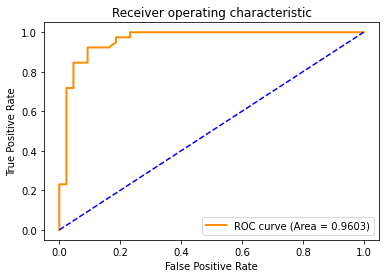

In [50]:
pred_prob1 = best_model_gb.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Xtreme Gradient Boosting

In [51]:
xgb = XGBClassifier(eval_metric='mlogloss')
parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
cv_xgb= GridSearchCV(xgb, parameters, cv=5)
cv_xgb.fit(X_train,y_train)
print_results(cv_xgb)

BEST PARAMS: {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1}

0.861 (+/-0.077) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1}
0.84 (+/-0.078) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3}
0.846 (+/-0.101) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5}
0.833 (+/-0.09) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 7}
0.883 (+/-0.069) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1}
0.867 (+/-0.063) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3}
0.852 (+/-0.069) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5}
0.846 (+/-0.093) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 7}
0.898 (+/-0.079) for {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1}
0.873 (+/-0.045) for {'gamma':

In [52]:
best_model_xgb=cv_xgb.best_estimator_
test_result_xgb=best_model_xgb.predict(X_test)

The Accuracy of the model: 0.8536585365853658
The Confusion Matrix:


(2.5, -0.5)

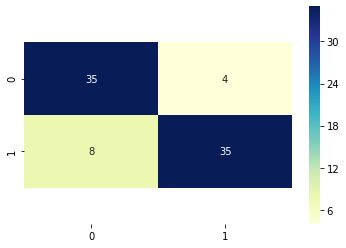

In [53]:
accuracy_xgb=accuracy_score(test_result_xgb,y_test)
print("The Accuracy of the model:",accuracy_xgb)
cm_xgb=confusion_matrix(test_result_xgb,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_xgb,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [54]:
print(classification_report(test_result_xgb,y_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.90      0.81      0.85        43

    accuracy                           0.85        82
   macro avg       0.86      0.86      0.85        82
weighted avg       0.86      0.85      0.85        82



In [55]:
confusion_metrics (cm_xgb)
test_scores['XGBoost']=[accuracy_xgb,cv_xgb.best_score_]

True Positives: 35
True Negatives: 35
False Positives: 4
False Negatives: 8
--------------------------------------------------
Accuracy: 0.8536585365853658
Mis-Classification: 0.14634146341463417
Sensitivity: 0.813953488372093
Specificity: 0.8974358974358975
Precision: 0.8974358974358975
f_1 Score: 0.8536585365853658


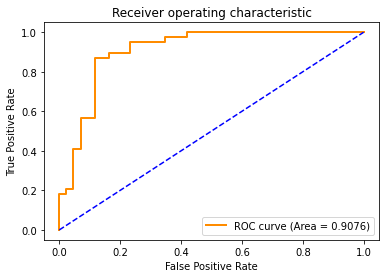

In [56]:
pred_prob1 = best_model_xgb.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Support Vector Classifier

In [57]:
svc = SVC(probability=True)
parameters = {'kernel': ['linear', 'rbf'],'C': [0.1, 1, 10,20]}
cv_svc = GridSearchCV(svc, parameters, cv=5)
cv_svc.fit(X_train,y_train)
print_results(cv_svc)

BEST PARAMS: {'C': 20, 'kernel': 'rbf'}

0.775 (+/-0.056) for {'C': 0.1, 'kernel': 'linear'}
0.688 (+/-0.084) for {'C': 0.1, 'kernel': 'rbf'}
0.793 (+/-0.068) for {'C': 1, 'kernel': 'linear'}
0.769 (+/-0.079) for {'C': 1, 'kernel': 'rbf'}
0.824 (+/-0.056) for {'C': 10, 'kernel': 'linear'}
0.836 (+/-0.092) for {'C': 10, 'kernel': 'rbf'}
0.824 (+/-0.069) for {'C': 20, 'kernel': 'linear'}
0.861 (+/-0.097) for {'C': 20, 'kernel': 'rbf'}


In [58]:
best_model_svc=cv_svc.best_estimator_
test_result_svc=best_model_svc.predict(X_test)

The Accuracy of the model: 0.8170731707317073
The Confusion Matrix:


(2.5, -0.5)

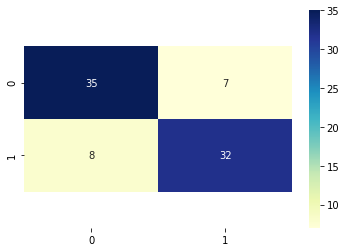

In [59]:
accuracy_svc=accuracy_score(test_result_svc,y_test)
print("The Accuracy of the model:",accuracy_svc)
cm_svc=confusion_matrix(test_result_svc,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_svc,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [60]:
print(classification_report(test_result_svc,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        42
           1       0.82      0.80      0.81        40

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



In [61]:
confusion_metrics (cm_svc)
test_scores['Support Vector Classifier']=[accuracy_svc,cv_xgb.best_score_]

True Positives: 32
True Negatives: 35
False Positives: 7
False Negatives: 8
--------------------------------------------------
Accuracy: 0.8170731707317073
Mis-Classification: 0.18292682926829273
Sensitivity: 0.8
Specificity: 0.8333333333333334
Precision: 0.8333333333333334
f_1 Score: 0.816326530612245


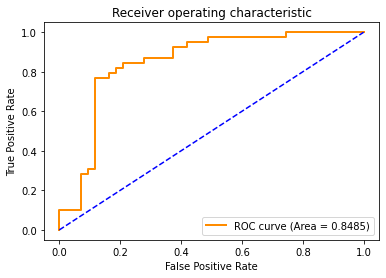

In [62]:
pred_prob1 = best_model_svc.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Naives Bayes


In [63]:
gnb = GaussianNB()
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
cv_gnb = GridSearchCV(gnb, parameters, cv=5)
cv_gnb.fit(X_train,y_train)
print_results(cv_gnb)

BEST PARAMS: {'var_smoothing': 0.0657933224657568}

0.738 (+/-0.091) for {'var_smoothing': 1.0}
0.741 (+/-0.071) for {'var_smoothing': 0.8111308307896871}
0.747 (+/-0.065) for {'var_smoothing': 0.657933224657568}
0.744 (+/-0.073) for {'var_smoothing': 0.533669923120631}
0.747 (+/-0.081) for {'var_smoothing': 0.43287612810830584}
0.753 (+/-0.077) for {'var_smoothing': 0.3511191734215131}
0.759 (+/-0.077) for {'var_smoothing': 0.2848035868435802}
0.769 (+/-0.075) for {'var_smoothing': 0.23101297000831597}
0.769 (+/-0.058) for {'var_smoothing': 0.1873817422860384}
0.769 (+/-0.058) for {'var_smoothing': 0.15199110829529336}
0.775 (+/-0.081) for {'var_smoothing': 0.12328467394420659}
0.772 (+/-0.077) for {'var_smoothing': 0.1}
0.775 (+/-0.089) for {'var_smoothing': 0.08111308307896872}
0.778 (+/-0.089) for {'var_smoothing': 0.0657933224657568}
0.772 (+/-0.084) for {'var_smoothing': 0.0533669923120631}
0.756 (+/-0.07) for {'var_smoothing': 0.04328761281083057}
0.756 (+/-0.065) for {'var_smoo

In [64]:
best_model_gnb=cv_gnb.best_estimator_
test_result_gnb=best_model_gnb.predict(X_test)

The Accuracy of the model: 0.7560975609756098
The Confusion Matrix:


(2.5, -0.5)

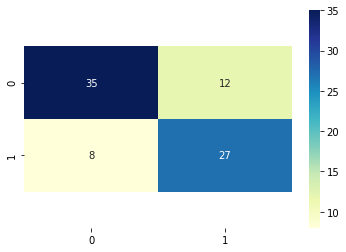

In [65]:
accuracy_gnb=accuracy_score(test_result_gnb,y_test)
print("The Accuracy of the model:",accuracy_gnb)
cm_gnb=confusion_matrix(test_result_gnb,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_gnb,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [66]:
print(classification_report(test_result_gnb,y_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        47
           1       0.69      0.77      0.73        35

    accuracy                           0.76        82
   macro avg       0.75      0.76      0.75        82
weighted avg       0.76      0.76      0.76        82



In [67]:
confusion_metrics (cm_gnb)
test_scores['Naives Bayes']=[accuracy_gnb,cv_gnb.best_score_]

True Positives: 27
True Negatives: 35
False Positives: 12
False Negatives: 8
--------------------------------------------------
Accuracy: 0.7560975609756098
Mis-Classification: 0.24390243902439024
Sensitivity: 0.7714285714285715
Specificity: 0.7446808510638298
Precision: 0.7446808510638298
f_1 Score: 0.7578187650360867


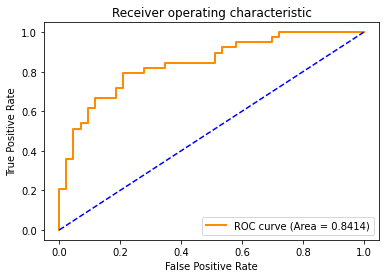

In [68]:
pred_prob1 = best_model_gnb.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### KNN Classifier

In [69]:
knn=KNeighborsClassifier()
parameters={'n_neighbors': range(1,30),'p':[1,2]}
cv_knn = GridSearchCV(knn, parameters, cv=5)
cv_knn.fit(X_train,y_train)
print_results(cv_knn)

BEST PARAMS: {'n_neighbors': 1, 'p': 1}

0.812 (+/-0.142) for {'n_neighbors': 1, 'p': 1}
0.79 (+/-0.165) for {'n_neighbors': 1, 'p': 2}
0.759 (+/-0.098) for {'n_neighbors': 2, 'p': 1}
0.735 (+/-0.134) for {'n_neighbors': 2, 'p': 2}
0.769 (+/-0.117) for {'n_neighbors': 3, 'p': 1}
0.735 (+/-0.098) for {'n_neighbors': 3, 'p': 2}
0.732 (+/-0.059) for {'n_neighbors': 4, 'p': 1}
0.676 (+/-0.067) for {'n_neighbors': 4, 'p': 2}
0.71 (+/-0.047) for {'n_neighbors': 5, 'p': 1}
0.691 (+/-0.069) for {'n_neighbors': 5, 'p': 2}
0.688 (+/-0.11) for {'n_neighbors': 6, 'p': 1}
0.676 (+/-0.063) for {'n_neighbors': 6, 'p': 2}
0.719 (+/-0.049) for {'n_neighbors': 7, 'p': 1}
0.685 (+/-0.102) for {'n_neighbors': 7, 'p': 2}
0.698 (+/-0.029) for {'n_neighbors': 8, 'p': 1}
0.667 (+/-0.07) for {'n_neighbors': 8, 'p': 2}
0.704 (+/-0.049) for {'n_neighbors': 9, 'p': 1}
0.661 (+/-0.074) for {'n_neighbors': 9, 'p': 2}
0.688 (+/-0.055) for {'n_neighbors': 10, 'p': 1}
0.648 (+/-0.086) for {'n_neighbors': 10, 'p': 2}
0

In [70]:
best_model_knn=cv_knn.best_estimator_
test_result_knn=best_model_knn.predict(X_test)

The Accuracy of the model: 0.7926829268292683
The Confusion Matrix:


(2.5, -0.5)

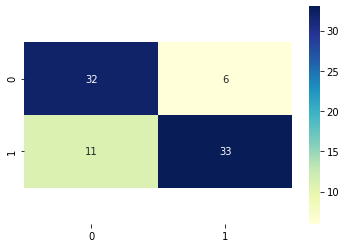

In [71]:
accuracy_knn=accuracy_score(test_result_knn,y_test)
print("The Accuracy of the model:",accuracy_knn)
cm_knn=confusion_matrix(test_result_knn,y_test)
print("The Confusion Matrix:")
ax=sns.heatmap(cm_knn,annot=True,cmap="YlGnBu",fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [72]:
print(classification_report(test_result_knn,y_test))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        38
           1       0.85      0.75      0.80        44

    accuracy                           0.79        82
   macro avg       0.80      0.80      0.79        82
weighted avg       0.80      0.79      0.79        82



In [73]:
confusion_metrics (cm_knn)
test_scores['KNN']=[accuracy_knn,cv_knn.best_score_]

True Positives: 33
True Negatives: 32
False Positives: 6
False Negatives: 11
--------------------------------------------------
Accuracy: 0.7926829268292683
Mis-Classification: 0.20731707317073167
Sensitivity: 0.75
Specificity: 0.8421052631578947
Precision: 0.8421052631578947
f_1 Score: 0.7933884297520661


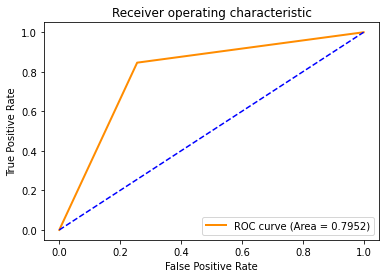

In [74]:
pred_prob1 = best_model_knn.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
plt.figure()
plt.plot(fpr1, tpr1,color='darkorange', label='ROC curve (Area = {0:.4f})'.format(auc_score1),lw=2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Selecting the Best Model

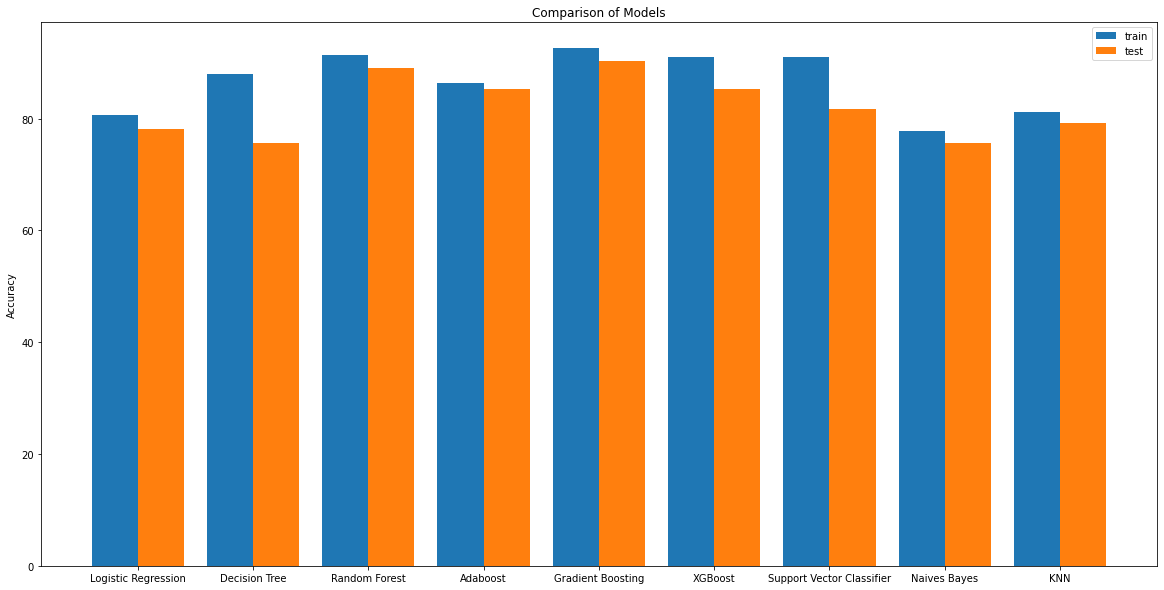

In [75]:
X=test_scores.keys()
test=[]
train=[]
for i in X:
    test.append((test_scores[i][0])*100)
    train.append((test_scores[i][1])*100)
X_axis = np.arange(len(X))
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
  
plt.xticks(X_axis, X)
plt.ylabel("Accuracy")
plt.title("Comparison of Models")
plt.legend()
plt.show()

### Saving the Best Model

In [76]:
joblib.dump(best_model_gb,'./Best_model.pkl')

['./Best_model.pkl']